In [3]:
import os
import json
import csv
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline
# import Collections
import gensim



In [ ]:
filenames = !ls ../results/*measure.csv

measures = {os.path.basename(name).replace('_measure.csv', ''): pd.read_csv(name) for name in filenames}

for mes in ['gensim_tfidf_mat', 'cuml_tokens', 'gensim_tokens', 'cuml_tfidf_mat']:
    plt.plot(measures[mes]['tweets'], measures[mes]['mem'], label=mes)
plt.legend()
plt.xlabel('tweets')
plt.ylabel('bytes')
# stemmed load == bad interned stemmed load
# stemmed vectorize == bad interned stemmed vectorized

In [2]:
for mes in measures.keys():
    plt.plot(measures[mes]['tweets'], measures[mes]['time'], label=mes)
plt.legend()
plt.xlabel('tweets')
plt.ylabel('bytes')


NameError: name 'measures' is not defined

In [ ]:
# Vocabulary should not be increasing linearly! this is not what I was promised
# mem increases linearly in function of cols/tweets ... as if each tweet is adding at least one new, unique word not found in any other tweet: URLs!?
# what's gonna help: stemming, filter dictionary?
pow(2, 9)

In [6]:
rows = []
with open('../trained-2021-06-02/filtered_dictionary.txt') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        rows.append(row)
rows.pop(0)

['94862426']

In [7]:
vocab = [ row[1] for row in rows ]

In [9]:
len(vocab)

100000

In [ ]:
occs = [ int(row[-1]) for row in rows ]
len(occs)


(array([  36339., 1042056.,  777024.,  118716.,   20372.]),
 array([0.0e+00, 1.5e+00, 1.0e+01, 1.0e+02, 1.0e+03, 1.0e+04]),
 <BarContainer object of 5 artists>)

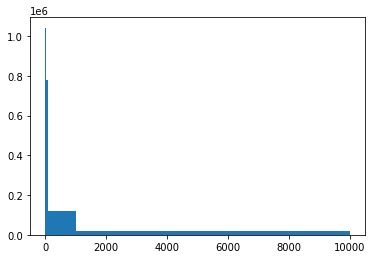

In [8]:
# plot = seaborn.histplot(occs)
# plt.hist(occs, bins=[10**i for i in range(8)])
plt.hist(occs, bins=[0, 1.5, 10, 100, 1000, 10000])

In [10]:
len([ occ for occ in occs if occ == 1 ])

36339

In [15]:
len([ occ for occ in occs if occ > 10 ])

886607

In [17]:
len([ occ for occ in occs if occ <= 10 ])


1114499

In [14]:
[ len([ occ for occ in occs if occ < i ])/len([ occ for occ in occs if occ >= i ]) for i in range(100) ]

[0.0,
 0.0,
 0.018495322855076456,
 0.310620176718043,
 0.4739993945210787,
 0.6432139924453933,
 0.7649845957905451,
 0.8824513278998186,
 0.982007376916037,
 1.0800523051912279,
 1.1687245518911122,
 1.2570383495731479,
 1.3394159602612619,
 1.4228782171660486,
 1.5030345027718295,
 1.5845033586431625,
 1.6661825778661277,
 1.7522235991016206,
 1.8410474831583505,
 1.9367437478261762,
 2.038719219602269,
 2.1494187025585902,
 2.2692895839187575,
 2.3978211628388726,
 2.5367414568623468,
 2.6860723212920647,
 2.8429302279134436,
 3.0088747498342245,
 3.17953286116791,
 3.354120747015268,
 3.531736326249615,
 3.709426591200593,
 3.888878573627351,
 4.063578578730554,
 4.235715051948834,
 4.404625963517331,
 4.5661420695717,
 4.723938295724007,
 4.880538242044356,
 5.0321516850545605,
 5.183562668215823,
 5.330830873583073,
 5.474772052209589,
 5.615970059444698,
 5.754628582615769,
 5.894635837114674,
 6.033319508783276,
 6.174711646367479,
 6.310697310784991,
 6.447361369557127,
 6.58